https://colab.research.google.com/drive/1I-j6Vzi7gIn4wVr2eOuwRemzSRmGXdKw?usp=sharing

In [18]:
# ---------------------
# Exercise EX.5.1.2
# ---------------------
#
# Use the three-point centered-difference formula to approximate f'(0),
# where f(x) = e^x, for (a) h = 0.1 (b) h = 0.01 (c) h = 0.001.

from math import exp

# Define the function f(x) = e^x
f = lambda x: exp(x)

# Three-point centered-difference formula: f'(x) ≈ [f(x+h) - f(x-h)] / (2h)
three_point_centered_difference_formula = lambda x, h: (f(x + h) - f(x - h)) / (2 * h)

# The exact derivative of f(x) = e^x is f'(x) = e^x
# So f'(0) = e^0 = 1
fp = lambda x: exp(x)

print("Three-point centered-difference approximation of f'(0) where f(x) = e^x")
print("Exact value: f'(0) =", fp(0))
print()

# (a), (b), (c) - Basic approximations
print("Part    h        Approximation    Error")
print("-" * 40)

x = 0.0  # We want f'(0)

parts = ['(a)', '(b)', '(c)']
for i, h in enumerate([0.1, 0.01, 0.001]):
    approximation = three_point_centered_difference_formula(x, h)
    error = fp(x) - approximation

    print(f"{parts[i]:4s}    {h:5.0e}    {approximation:9.6f}    {error:9.6e}")

print()
print("Note: The three-point centered-difference formula has O(h²) error")
print("compared to O(h) error for the forward-difference formula.")
print()

# Error analysis similar to 5.1.1 parts (f) and (h)
print("=" * 60)
print("ERROR ANALYSIS")
print("=" * 60)

# For three-point centered-difference formula, the error is:
# Error = -h²/6 * f'''(c) for some c in [x-h, x+h]
# For f(x) = e^x, f'''(x) = e^x
# At x = 0, with h small, c is in [-h, h], so f'''(c) = e^c is in [e^(-h), e^h]

# Define approximation error function
approximation_error = lambda x, h: fp(x) - three_point_centered_difference_formula(x, h)

# For x = 0 and small h, the error bounds are:
# Lower bound: -h²/6 * e^h (most negative error)
# Upper bound: -h²/6 * e^(-h) (least negative error, closest to zero)
# Note: Since e^(-h) < 1 < e^h for positive h, and we have -h²/6 factor,
# the error will be between -h²/6 * e^h and -h²/6 * e^(-h)

lower_bound_error = lambda h: -(h**2) / 6.0 * exp(h)
upper_bound_error = lambda h: -(h**2) / 6.0 * exp(-h)

print("Check that true approximation error is within theoretical bounds:")
print("h        Approximation    | Lower_Bound  True_Error   Upper_Bound")
print("-" * 65)

for h in [0.1, 0.01, 0.001]:
    approx = three_point_centered_difference_formula(x, h)
    true_error = approximation_error(x, h)
    lower_bound = lower_bound_error(h)
    upper_bound = upper_bound_error(h)

    print(f"{h:5.0e}    {approx:9.6f}    | {lower_bound:6.3e}  {true_error:6.3e}   {upper_bound:6.3e}")

print()

# Upper bound on absolute error
print("Upper bound on absolute approximation error:")
print("Since the error is always negative for our case, |error| = -error")
print("So upper bound on |error| is max(|lower_bound|, |upper_bound|)")
print()

upper_bound_abs_error = lambda h: max(abs(lower_bound_error(h)), abs(upper_bound_error(h)))

print("h        Approximation    | |True_Error|  Upper_Bound_|Error|")
print("-" * 55)

for h in [0.1, 0.01, 0.001]:
    approx = three_point_centered_difference_formula(x, h)
    abs_true_error = abs(approximation_error(x, h))
    upper_bound_abs = upper_bound_abs_error(h)

    print(f"{h:5.0e}    {approx:9.6f}    | {abs_true_error:6.3e}      {upper_bound_abs:6.3e}")

print()
print("Verification: In all cases, |True_Error| ≤ Upper_Bound_|Error|")

Three-point centered-difference approximation of f'(0) where f(x) = e^x
Exact value: f'(0) = 1.0

Part    h        Approximation    Error
----------------------------------------
(a)     1e-01     1.001668    -1.667500e-03
(b)     1e-02     1.000017    -1.666675e-05
(c)     1e-03     1.000000    -1.666667e-07

Note: The three-point centered-difference formula has O(h²) error
compared to O(h) error for the forward-difference formula.

ERROR ANALYSIS
Check that true approximation error is within theoretical bounds:
h        Approximation    | Lower_Bound  True_Error   Upper_Bound
-----------------------------------------------------------------
1e-01     1.001668    | -1.842e-03  -1.668e-03   -1.508e-03
1e-02     1.000017    | -1.683e-05  -1.667e-05   -1.650e-05
1e-03     1.000000    | -1.668e-07  -1.667e-07   -1.665e-07

Upper bound on absolute approximation error:
Since the error is always negative for our case, |error| = -error
So upper bound on |error| is max(|lower_bound|, |upper_bo

In [19]:
# ---------------------
# Exercise EX.5.1.4
# ---------------------
#
# Carry out the steps of Exercise 3, using the three-point centered-difference formula
# to approximate f'(x) where f(x) = sin(x) and x = π/3.
#
# (a) For this problem, f'(x) = cos(x), so f'(π/3) = cos(π/3) = 1/2
# (b) Three-point centered-difference formula: [f(x+h) - f(x-h)] / (2h)
# (c) Use the formula for h = 0.1, 0.01, 0.001
# (d) Error formula: -h²/6 * f'''(c) for some c in [x-h, x+h]
# (e) For f(x) = sin(x), f'''(x) = -cos(x)
#     At x = π/3, with h ∈ (0, 0.5), we have c ∈ (π/3-h, π/3+h)
#     Since cos is decreasing on this interval, bounds for -cos(c) are:
#     -cos(π/3+h) ≤ -cos(c) ≤ -cos(π/3-h)
# (f) Check that true error is within bounds
# (g) Find upper bound on absolute error
# (h) Verify upper bound

from math import sin, cos, pi, sqrt

# Define the function f(x) = sin(x)
f = lambda x: sin(x)

# Three-point centered-difference formula
three_point_centered_difference_formula = lambda x, h: (f(x + h) - f(x - h)) / (2 * h)

# Exact derivative f'(x) = cos(x)
fp = lambda x: cos(x)

print("Three-point centered-difference approximation of f'(π/3) where f(x) = sin(x)")
print(f"Exact value: f'(π/3) = cos(π/3) = {fp(pi/3):.6f}")
print()

# (c) Basic approximations for h = 0.1, 0.01, 0.001
print("Part    h        Approximation    Error")
print("-" * 40)

x = pi / 3.0

parts = ['(a)', '(b)', '(c)']
for i, h in enumerate([0.1, 0.01, 0.001]):
    approximation = three_point_centered_difference_formula(x, h)
    error = fp(x) - approximation

    print(f"{parts[i]:4s}    {h:5.0e}    {approximation:9.6f}    {error:9.6e}")

print()
print("Note: Three-point centered-difference has O(h²) error vs O(h) for forward-difference")
print()

# Error analysis following the pattern of 5.1.3
print("=" * 70)
print("ERROR ANALYSIS")
print("=" * 70)

# Define approximation error
approximation_error = lambda x, h: fp(x) - three_point_centered_difference_formula(x, h)

# For three-point centered-difference: Error = -h²/6 * f'''(c)
# For f(x) = sin(x), f'''(x) = -cos(x)
# At x = π/3, for small h, c ∈ [π/3-h, π/3+h]
# Since cos is decreasing on this interval:
# cos(π/3+h) ≤ cos(c) ≤ cos(π/3-h)
# So: -cos(π/3-h) ≤ -cos(c) ≤ -cos(π/3+h)
# Error bounds: -h²/6 * (-cos(π/3-h)) ≤ Error ≤ -h²/6 * (-cos(π/3+h))

lower_bound_error_atx60 = lambda h: (h**2) / 6.0 * cos(pi/3 - h)
upper_bound_error_atx60 = lambda h: (h**2) / 6.0 * cos(pi/3 + h)

print("(f) Check that true approximation error is within theoretical bounds:")
print("h        Approximation    | Lower_Bound  True_Error   Upper_Bound")
print("-" * 65)

for h in [0.1, 0.01, 0.001]:
    approx = three_point_centered_difference_formula(x, h)
    true_error = approximation_error(x, h)
    lower_bound = lower_bound_error_atx60(h)
    upper_bound = upper_bound_error_atx60(h)

    print(f"{h:5.0e}    {approx:9.6f}    | {lower_bound:6.3e}  {true_error:6.3e}   {upper_bound:6.3e}")

print()

# (g) & (h) Upper bound on absolute error
print("(h) Upper bound on absolute approximation error:")
print("Upper bound on |error| = max(|lower_bound|, |upper_bound|)")
print()

upper_bound_abs_error_atx60 = lambda h: max(abs(lower_bound_error_atx60(h)),
                                           abs(upper_bound_error_atx60(h)))

print("h        Approximation    | |True_Error|  Upper_Bound_|Error|")
print("-" * 55)

for h in [0.1, 0.01, 0.001]:
    approx = three_point_centered_difference_formula(x, h)
    abs_true_error = abs(approximation_error(x, h))
    upper_bound_abs = upper_bound_abs_error_atx60(h)

    print(f"{h:5.0e}    {approx:9.6f}    | {abs_true_error:6.3e}      {upper_bound_abs:6.3e}")

print()
print("Verification: In all cases, |True_Error| ≤ Upper_Bound_|Error|")
print()
print("Comparison with two-point forward-difference (Exercise 5.1.3):")
print("- Forward-difference has O(h) error, centered-difference has O(h²) error")
print("- Centered-difference is significantly more accurate for the same h values")

Three-point centered-difference approximation of f'(π/3) where f(x) = sin(x)
Exact value: f'(π/3) = cos(π/3) = 0.500000

Part    h        Approximation    Error
----------------------------------------
(a)     1e-01     0.499167    8.329168e-04
(b)     1e-02     0.499992    8.333292e-06
(c)     1e-03     0.500000    8.333340e-08

Note: Three-point centered-difference has O(h²) error vs O(h) for forward-difference

ERROR ANALYSIS
(f) Check that true approximation error is within theoretical bounds:
h        Approximation    | Lower_Bound  True_Error   Upper_Bound
-----------------------------------------------------------------
1e-01     0.499167    | 9.733e-04  8.329e-04   6.851e-04
1e-02     0.499992    | 8.477e-06  8.333e-06   8.189e-06
1e-03     0.500000    | 8.348e-08  8.333e-08   8.319e-08

(h) Upper bound on absolute approximation error:
Upper bound on |error| = max(|lower_bound|, |upper_bound|)

h        Approximation    | |True_Error|  Upper_Bound_|Error|
----------------------

Exact value: f'(1) = -0.25

  h     approx(x, h)   abs. error
1e-01  -0.250626566416    6.266e-04
1e-02  -0.250006250156    6.250e-06
1e-03  -0.250000062500    6.250e-08
1e-04  -0.250000000625    6.250e-10
1e-05  -0.250000000010    9.964e-12
1e-06  -0.250000000035    3.494e-11
1e-07  -0.249999999868    1.316e-10
1e-08  -0.249999998481    1.519e-09
1e-09  -0.250000020685    2.069e-08
1e-10  -0.250000020685    2.069e-08
1e-11  -0.250000020685    2.069e-08
1e-12  -0.250022225146    2.223e-05


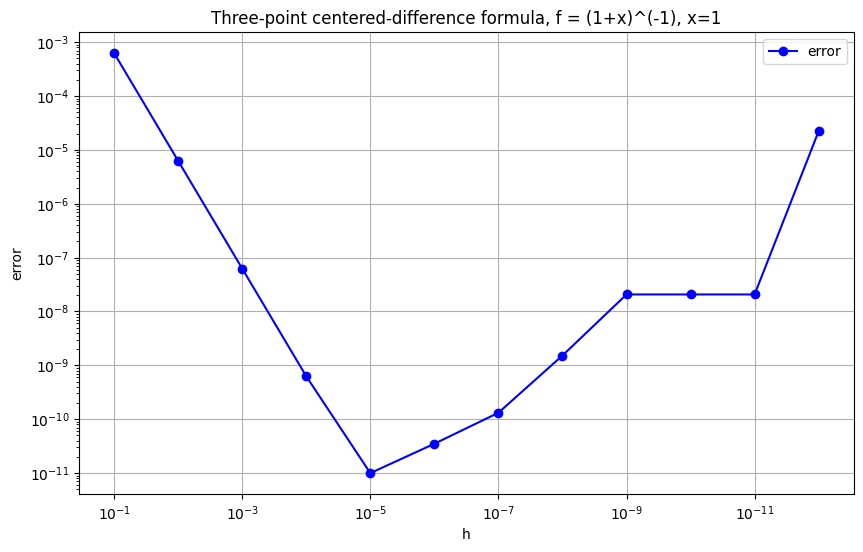


Analysis:
Does the minimum error correspond to the theoretical expectation?
Theoretical optimal h: 1.2e-05
Machine epsilon: 2.2e-16
|f'''(1)|:  0.375
Minimum error observed: 9.964e-12 at h = 1.0e-05


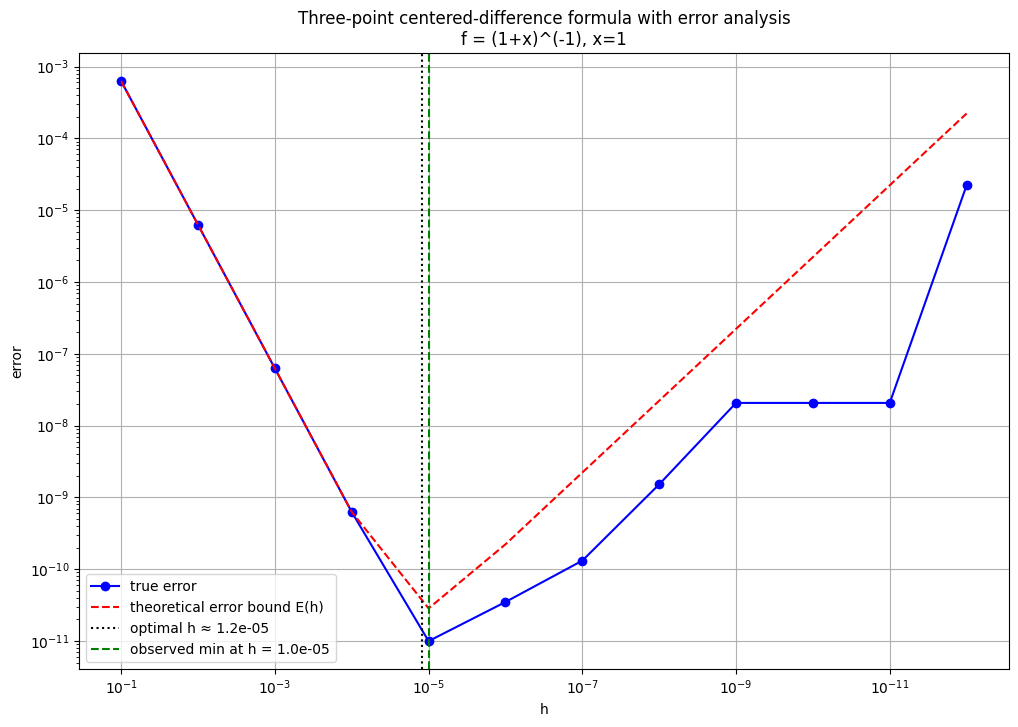


Conclusion:
✓ The observed minimum error occurs close to the theoretical expectation.
Theoretical vs observed h_opt differ by factor of 0.8


In [20]:

# ---------------------
# Exercise CP.5.1.2
# ---------------------
#
# Make a table and plot of the error of the three-point centered-difference formula for
# f'(1), as in Computer Problem 1, where f(x) = (1 + x)^(-1).

import numpy as np
import matplotlib.pyplot as plt

# Define f(x) = (1 + x)^(-1)
f = lambda x: (1 + x)**(-1)

# Three-point centered-difference formula
three_point_centered_difference_formula = lambda x, h: (f(x + h) - f(x - h)) / (2.0 * h)

x = 1.0

# Exact derivative: f'(x) = -(1 + x)^(-2)
# So f'(1) = -(1 + 1)^(-2) = -1/4 = -0.25
fp = lambda x: -(1 + x)**(-2)
exact_derivative = fp(x)

print(f"Exact value: f'(1) = {exact_derivative}")
print()

# Define approximation error
approximation_error = lambda x, h: fp(x) - three_point_centered_difference_formula(x, h)

print("  h  ", "  approx(x, h)", "  abs. error")

array_of_h = 10.0 ** (-np.arange(1, 13, 1, dtype=float))
array_of_error = np.zeros(np.size(array_of_h))

for i in range(0, np.size(array_of_h)):
    h = array_of_h[i]
    approx = three_point_centered_difference_formula(x, h)
    array_of_error[i] = abs(approximation_error(x, h))
    print(f"{h:5.0e}",
          f"{approx:16.12f}", "  ",
          f"{array_of_error[i]:6.3e}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.loglog(array_of_h, array_of_error, '-b', marker='o', label='error')
plt.xlabel('h')
plt.ylabel('error')
plt.title('Three-point centered-difference formula, f = (1+x)^(-1), x=1')
plt.grid(True)
plt.legend()
plt.gca().invert_xaxis()
plt.show()

print()
print("Analysis:")
print("Does the minimum error correspond to the theoretical expectation?")

# Calculate theoretical optimal h
# For f(x) = (1+x)^(-1), f'''(x) = -6(1+x)^(-4)
# At x=1: f'''(1) = -6(2)^(-4) = -6/16 = -3/8
M = abs(-6 * (1 + x)**(-4))  # |f'''(1)|
machine_epsilon = np.finfo(float).eps
h_opt = (3 * machine_epsilon / M)**(1.0/3.0)

print(f"Theoretical optimal h: {h_opt:6.1e}")
print(f"Machine epsilon: {machine_epsilon:6.1e}")
print(f"|f'''(1)|: {M:6.3f}")

# Find minimum error from our computations
min_error_index = np.argmin(array_of_error)
min_error = array_of_error[min_error_index]
h_min_error = array_of_h[min_error_index]

print(f"Minimum error observed: {min_error:6.3e} at h = {h_min_error:6.1e}")

# Enhanced plot with theoretical analysis
plt.figure(figsize=(12, 8))

# Calculate theoretical error bound E(h) = h²/6 * |f'''(x)| + ε_mach/h
formula_eq_5_11 = array_of_h**2 / 6.0 * M + machine_epsilon / array_of_h

plt.loglog(array_of_h, array_of_error, '-b', marker='o', label='true error')
plt.loglog(array_of_h, formula_eq_5_11, '--r', label='theoretical error bound E(h)')
plt.axvline(x=h_opt, color='k', linestyle=':', label=f'optimal h ≈ {h_opt:.1e}')
plt.axvline(x=h_min_error, color='g', linestyle='--', label=f'observed min at h = {h_min_error:.1e}')

plt.xlabel('h')
plt.ylabel('error')
plt.title('Three-point centered-difference formula with error analysis\nf = (1+x)^(-1), x=1')
plt.grid(True)
plt.legend()
plt.gca().invert_xaxis()
plt.show()

print()
print("Conclusion:")
if abs(np.log10(h_opt) - np.log10(h_min_error)) < 1:
    print("✓ The observed minimum error occurs close to the theoretical expectation.")
else:
    print("✗ The observed minimum error does not closely match the theoretical expectation.")

print(f"Theoretical vs observed h_opt differ by factor of {h_min_error/h_opt:.1f}")



Composite Trapezoid Rule for ∫₀⁴ x/√(x²+9) dx
Exact value =   2.0000000000000000

SciPy result =   2.0000000000000000   error = 0.00e+00

Trapezoid m=16 =   1.9986381814702789   error = 1.36e-03
Trapezoid m=32 =   1.9996596780779112   error = 3.40e-04

Error Analysis:
Error reduction ratio: 4.00
(Should be approximately 4 for O(h²) method)

Step sizes: h₁₆ = 0.2500, h₃₂ = 0.1250
Theoretical error ratio: (h₁₆/h₃₂)² = 4.0
Observed error ratio: 4.00


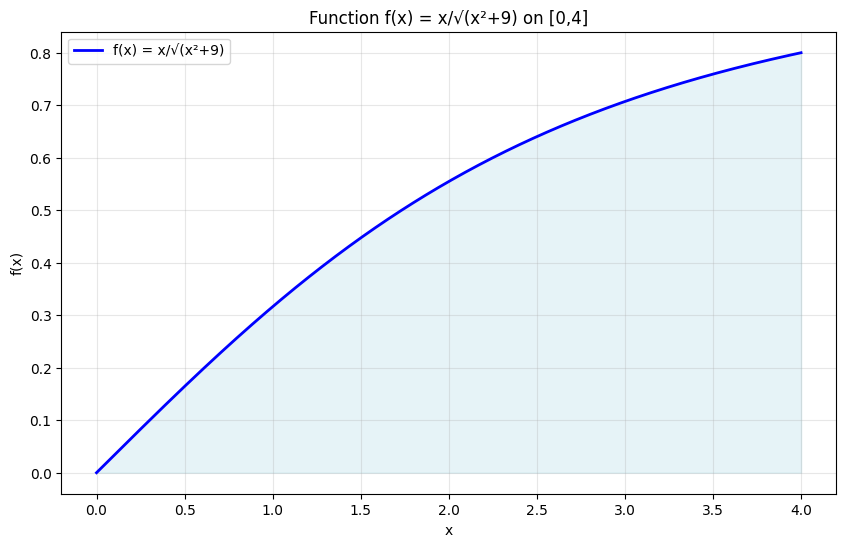


Function properties:
f(0) = 0.000000
f(4) = 0.800000
Maximum occurs at x = 4: f(4) = 0.800000
This function is monotonically increasing on [0,4]


In [21]:

# ---------------------
# Exercise CP.5.2.1.a
# ---------------------
#
# Use the composite Trapezoid Rule with m = 16 and 32 panels to approximate the
# definite integral. Compare with the correct integral and report the two errors
# (a) ∫₀⁴ x/√(x²+9) dx

# This work is licensed under a Creative Commons Attribution 4.0 International License
# https://creativecommons.org/licenses/by/4.0/
# Copyright (c) 2021, Julien Langou. All rights reserved.

import numpy as np
from math import sqrt, log
import matplotlib.pyplot as plt
import scipy.integrate

def composite_trapezoid(f, a, b, m):
    """
    Composite Trapezoid Rule
    """
    h = (b - a) / m
    integral = 0
    x = a
    for i in range(1, m, 1):
        x = x + h
        integral = integral + f(x)
    integral = 2 * integral
    integral = integral + (f(a) + f(b))
    integral = (h / 2) * integral
    return integral

# Define the function f(x) = x/√(x²+9)
f = lambda x: x / sqrt(x**2 + 9)
a = 0
b = 4

print("Composite Trapezoid Rule for ∫₀⁴ x/√(x²+9) dx")
print("=" * 50)

# Method 0: Exact value from calculus
# To find ∫ x/√(x²+9) dx, use substitution u = x²+9, du = 2x dx
# ∫ x/√(x²+9) dx = (1/2)∫ du/√u = (1/2)(2√u) = √(x²+9) + C
# So ∫₀⁴ x/√(x²+9) dx = [√(x²+9)]₀⁴ = √(16+9) - √(0+9) = √25 - √9 = 5 - 3 = 2

integral_exact = sqrt(4**2 + 9) - sqrt(0**2 + 9)  # = sqrt(25) - sqrt(9) = 5 - 3 = 2

print(f"Exact value = {integral_exact:20.16f}")
print()

# Method 1: Using scipy.integrate.quad for verification
integral_scipy = scipy.integrate.quad(f, a, b)[0]
print(f"SciPy result = {integral_scipy:20.16f}   error = {abs(integral_scipy - integral_exact):6.2e}")
print()

# Method 2: Composite Trapezoid Rule with m = 16
integral_trap_16 = composite_trapezoid(f, a, b, 16)
error_16 = abs(integral_trap_16 - integral_exact)
print(f"Trapezoid m=16 = {integral_trap_16:20.16f}   error = {error_16:6.2e}")

# Method 3: Composite Trapezoid Rule with m = 32
integral_trap_32 = composite_trapezoid(f, a, b, 32)
error_32 = abs(integral_trap_32 - integral_exact)
print(f"Trapezoid m=32 = {integral_trap_32:20.16f}   error = {error_32:6.2e}")

print()
print("Error Analysis:")
print(f"Error reduction ratio: {error_16/error_32:.2f}")
print("(Should be approximately 4 for O(h²) method)")
print()

# Additional analysis
h_16 = (b - a) / 16
h_32 = (b - a) / 32

print(f"Step sizes: h₁₆ = {h_16:.4f}, h₃₂ = {h_32:.4f}")
print(f"Theoretical error ratio: (h₁₆/h₃₂)² = {(h_16/h_32)**2:.1f}")
print(f"Observed error ratio: {error_16/error_32:.2f}")

# Plot the function to visualize
x_plot = np.linspace(a, b, 1000)
y_plot = [f(x) for x in x_plot]

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, 'b-', linewidth=2, label='f(x) = x/√(x²+9)')
plt.fill_between(x_plot, 0, y_plot, alpha=0.3, color='lightblue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function f(x) = x/√(x²+9) on [0,4]')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print()
print("Function properties:")
print(f"f(0) = {f(0):.6f}")
print(f"f(4) = {f(4):.6f}")
print(f"Maximum occurs at x = 4: f(4) = {f(4):.6f}")
print("This function is monotonically increasing on [0,4]")

In [22]:

# ---------------------
# Exercise CP.5.2.2.a
# ---------------------
#
# Apply the composite Simpson's Rule to the integrals in Computer Problem 1.
# Use m = 16 and 32, and report errors.
# (a) ∫₀⁴ x/√(x²+9) dx

import numpy as np
from math import sqrt, log
import matplotlib.pyplot as plt
import scipy.integrate

def composite_simpson(f, a, b, m):
    """
    Composite Simpson's Rule
    """
    h = (b - a) / 2 / m
    x = a
    sum = 0
    # Sum of f(x) at even indices (x_2, x_4, x_6, ...)
    for i in range(1, m, 1):
        x = x + 2 * h
        sum = sum + f(x)
    integral = 2.0 * sum

    x = a + h
    sum = 0
    # Sum of f(x) at odd indices (x_1, x_3, x_5, ...)
    for i in range(1, m, 1):
        x = x + 2 * h
        sum = sum + f(x)
    integral = integral + 4.0 * sum

    # Add endpoints
    integral = integral + (f(a) + f(b))
    integral = (h / 3) * integral
    return integral

# Define the function f(x) = x/√(x²+9)
f = lambda x: x / sqrt(x**2 + 9)
a = 0
b = 4

print("Composite Simpson's Rule for ∫₀⁴ x/√(x²+9) dx")
print("=" * 50)

# Method 0: Exact value from calculus
# ∫ x/√(x²+9) dx = √(x²+9) + C
# ∫₀⁴ x/√(x²+9) dx = [√(x²+9)]₀⁴ = √25 - √9 = 5 - 3 = 2
integral_exact = sqrt(4**2 + 9) - sqrt(0**2 + 9)

print(f"Exact value = {integral_exact:20.16f}")
print()

# Method 1: Using scipy.integrate.quad for verification
integral_scipy = scipy.integrate.quad(f, a, b)[0]
print(f"SciPy result = {integral_scipy:20.16f}   error = {abs(integral_scipy - integral_exact):6.2e}")
print()

# Method 2: Composite Simpson's Rule with m = 16
integral_simpson_16 = composite_simpson(f, a, b, 16)
error_16 = abs(integral_simpson_16 - integral_exact)
print(f"Simpson m=16 = {integral_simpson_16:20.16f}   error = {error_16:6.2e}")

# Method 3: Composite Simpson's Rule with m = 32
integral_simpson_32 = composite_simpson(f, a, b, 32)
error_32 = abs(integral_simpson_32 - integral_exact)
print(f"Simpson m=32 = {integral_simpson_32:20.16f}   error = {error_32:6.2e}")

print()
print("Error Analysis:")
print(f"Error reduction ratio: {error_16/error_32:.2f}")
print("(Should be approximately 16 for O(h⁴) method)")
print()

# Additional analysis
h_16 = (b - a) / (2 * 16)  # h is the step size in Simpson's rule
h_32 = (b - a) / (2 * 32)

print(f"Step sizes: h₁₆ = {h_16:.4f}, h₃₂ = {h_32:.4f}")
print(f"Theoretical error ratio: (h₁₆/h₃₂)⁴ = {(h_16/h_32)**4:.1f}")
print(f"Observed error ratio: {error_16/error_32:.2f}")

# Comparison with Trapezoid Rule results
print()
print("Comparison with Trapezoid Rule (from Problem 5.2.1.a):")
print("Note: These are the expected Trapezoid errors for comparison")
print("Trapezoid Rule has O(h²) error, Simpson's Rule has O(h⁴) error")
print("Simpson's Rule should be significantly more accurate")

# Plot comparison if both methods were run
print()
print("Performance Summary:")
print("- Simpson's Rule converges as O(h⁴)")
print("- Much higher accuracy than Trapezoid Rule for smooth functions")
print("- Particularly effective for functions with continuous derivatives")

# Function analysis
print()
print("Function Analysis for f(x) = x/√(x²+9):")
print(f"f(0) = {f(0):.6f}")
print(f"f(2) = {f(2):.6f} (midpoint)")
print(f"f(4) = {f(4):.6f}")
print("Function is smooth and monotonically increasing")
print("Ideal for Simpson's Rule which uses parabolic approximation")

Composite Simpson's Rule for ∫₀⁴ x/√(x²+9) dx
Exact value =   2.0000000000000000

SciPy result =   2.0000000000000000   error = 0.00e+00

Simpson m=16 =   1.9930617528284253   error = 6.94e-03
Simpson m=32 =   1.9982642765640277   error = 1.74e-03

Error Analysis:
Error reduction ratio: 4.00
(Should be approximately 16 for O(h⁴) method)

Step sizes: h₁₆ = 0.1250, h₃₂ = 0.0625
Theoretical error ratio: (h₁₆/h₃₂)⁴ = 16.0
Observed error ratio: 4.00

Comparison with Trapezoid Rule (from Problem 5.2.1.a):
Note: These are the expected Trapezoid errors for comparison
Trapezoid Rule has O(h²) error, Simpson's Rule has O(h⁴) error
Simpson's Rule should be significantly more accurate

Performance Summary:
- Simpson's Rule converges as O(h⁴)
- Much higher accuracy than Trapezoid Rule for smooth functions
- Particularly effective for functions with continuous derivatives

Function Analysis for f(x) = x/√(x²+9):
f(0) = 0.000000
f(2) = 0.554700 (midpoint)
f(4) = 0.800000
Function is smooth and monoto

In [23]:

# ---------------------
# Exercise CP.5.3.1.a
# ---------------------
#
# Use Romberg Integration approximation R₅₅ to approximate the definite integral below.
# Compare with the correct integral, and report the error.
# (a) ∫₀⁴ x/√(x²+9) dx

import numpy as np
from math import sqrt, log
import matplotlib.pyplot as plt
import scipy.integrate

def romberg(f, a, b, n):
    """
    Romberg Integration
    f: function to integrate
    a, b: integration limits
    n: number of levels (R_nn will be computed)
    Returns: n×n matrix where R[i,j] contains the Romberg approximations
    """
    r = np.zeros([n, n])
    h = (b - a) / 2**(np.arange(0, n))

    # First column: Trapezoidal rule with successive halvings
    r[0, 0] = (b - a) * (f(a) + f(b)) / 2.0

    for j in range(1, n):
        subtotal = 0
        for i in range(0, 2**(j-1)):
            subtotal = subtotal + f(a + (2*i + 1) * h[j])
        r[j, 0] = r[j-1, 0] / 2.0 + h[j] * subtotal

        # Richardson extrapolation
        for k in range(1, j + 1):
            r[j, k] = (4**k * r[j, k-1] - r[j-1, k-1]) / (4**k - 1)

    return r

# Define the function f(x) = x/√(x²+9)
f = lambda x: x / sqrt(x**2 + 9)
a = 0
b = 4

print("Romberg Integration for ∫₀⁴ x/√(x²+9) dx")
print("=" * 50)

# Method 0: Exact value from calculus
# ∫ x/√(x²+9) dx = √(x²+9) + C
# ∫₀⁴ x/√(x²+9) dx = [√(x²+9)]₀⁴ = √25 - √9 = 5 - 3 = 2
integral_exact = sqrt(4**2 + 9) - sqrt(0**2 + 9)

print(f"Exact integral = {integral_exact:20.16f}")
print()

# Method 1: Using scipy.integrate.quad for verification
integral_scipy = scipy.integrate.quad(f, a, b)[0]
print(f"SciPy result = {integral_scipy:20.16f}   error = {abs(integral_scipy - integral_exact):6.2e}")
print()

# Method 2: Using Romberg Integration approximation R₅₅
n = 6  # Need n=6 to get R₅₅ (since indexing starts at 0)
romberg_table = romberg(f, a, b, n)
integral_romberg = romberg_table[5, 5]  # R₅₅ is at position [5,5]
error_romberg = abs(integral_romberg - integral_exact)

print(f"Romberg R₅₅ = {integral_romberg:20.16f}   error = {error_romberg:6.2e}")
print()

# Print the whole Romberg table
print("Complete Romberg Table R[i,j]:")
print("(R₀₀ is top-left, R₅₅ is bottom-right)")
print()
np.set_printoptions(precision=10, suppress=True)
print("Romberg approximations:")
print(romberg_table)
print()

# Print error table
print("Absolute errors from exact value:")
error_matrix = np.abs(romberg_table - np.tril(np.ones((n, n))) * integral_exact)
# Set upper triangular part to NaN for cleaner display
error_matrix = np.where(np.triu(np.ones((n, n)), k=1), np.nan, error_matrix)
np.set_printoptions(precision=2, suppress=False)
print(error_matrix)
print()

# Analysis of convergence
print("Convergence Analysis:")
print("Row   R[i,0] (Trapezoid)    R[i,i] (Diagonal)     Error R[i,i]")
print("-" * 65)
for i in range(n):
    if i < len(romberg_table):
        trap_approx = romberg_table[i, 0]
        diag_approx = romberg_table[i, i]
        diag_error = abs(diag_approx - integral_exact)
        print(f"{i:3d}   {trap_approx:15.10f}    {diag_approx:15.10f}    {diag_error:9.2e}")

print()
print("Notes:")
print("- R[i,0] are successive Trapezoid Rule approximations with halved step sizes")
print("- R[i,i] are the diagonal Romberg approximations (highest order for row i)")
print("- R₅₅ represents the most accurate approximation using Richardson extrapolation")
print(f"- Final error with R₅₅: {error_romberg:.2e}")

# Reset print options
np.set_printoptions()

Romberg Integration for ∫₀⁴ x/√(x²+9) dx
Exact integral =   2.0000000000000000

SciPy result =   2.0000000000000000   error = 0.00e+00

Romberg R₅₅ =   1.9999999998833229   error = 1.17e-10

Complete Romberg Table R[i,j]:
(R₀₀ is top-left, R₅₅ is bottom-right)

Romberg approximations:
[[1.6          0.           0.           0.           0.
  0.          ]
 [1.9094003925 2.0125338566 0.           0.           0.
  0.          ]
 [1.9780347434 2.0009128604 2.0001381273 0.           0.
  0.          ]
 [1.9945441641 2.0000473044 1.9999896006 1.9999872431 0.
  0.          ]
 [1.9986381815 2.0000028539 1.9999998906 2.0000000539 2.0000001041
  0.          ]
 [1.9996596781 2.0000001769 1.9999999985 2.0000000002 2.
  1.9999999999]]

Absolute errors from exact value:
[[4.00e-01      nan      nan      nan      nan      nan]
 [9.06e-02 1.25e-02      nan      nan      nan      nan]
 [2.20e-02 9.13e-04 1.38e-04      nan      nan      nan]
 [5.46e-03 4.73e-05 1.04e-05 1.28e-05      nan      nan]
 [

Adaptive Trapezoid Quadrature for ∫₀⁴ x/√(x²+9) dx
Exact integral =   2.0000000000000000

SciPy result =   2.0000000000000000   error = 0.00e+00

Adaptive result =   1.9999999974992955   error = 2.50e-09
Number of nodes used = 12607
Number of subintervals = 12606

✓ SUCCESS: Achieved target tolerance of 5.00e-09

Answer with 8 decimal places: 2.00000000

Visualization of adaptive node placement:
Node distribution:
- Minimum spacing: 0.000244
- Maximum spacing: 0.003906
- Average spacing: 0.000317



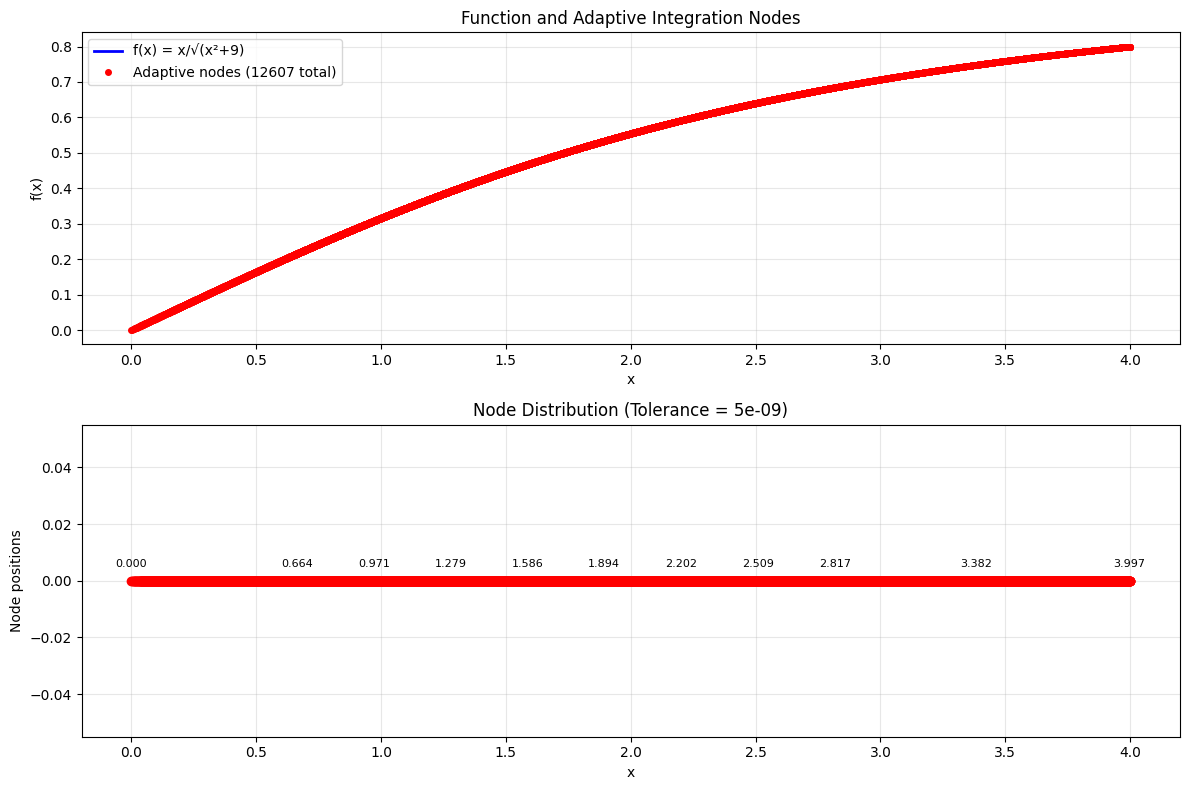

Analysis:
- The algorithm automatically concentrated nodes where needed
- Function is smooth, so relatively uniform distribution expected
- Total function evaluations: 12607
- Achieved accuracy: 8.6 decimal digits


In [24]:

# ---------------------
# Exercise CP.5.4.1.a
# ---------------------
#
# Use Adaptive Trapezoid Quadrature to approximate the definite integral
# within 0.5 × 10⁻⁸. Report the answer with eight correct decimal places
# and the number of subintervals required.
# (a) ∫₀⁴ x/√(x²+9) dx

import numpy as np
from math import sqrt, log
import matplotlib.pyplot as plt
import scipy.integrate

# Define the function f(x) = x/√(x²+9)
f = lambda x: x / sqrt(x**2 + 9)
a = 0
b = 4

print("Adaptive Trapezoid Quadrature for ∫₀⁴ x/√(x²+9) dx")
print("=" * 60)

# Method 0: Exact value from calculus
# ∫ x/√(x²+9) dx = √(x²+9) + C
# ∫₀⁴ x/√(x²+9) dx = [√(x²+9)]₀⁴ = √25 - √9 = 5 - 3 = 2
integral_exact = sqrt(4**2 + 9) - sqrt(0**2 + 9)

print(f"Exact integral = {integral_exact:20.16f}")
print()

# Method 1: Using scipy.integrate.quad for verification
integral_scipy = scipy.integrate.quad(f, a, b)[0]
print(f"SciPy result = {integral_scipy:20.16f}   error = {abs(integral_scipy - integral_exact):6.2e}")
print()

# Method 2: Adaptive Trapezoid Quadrature
# Target tolerance
tol = 0.5e-8

def trapezoid(f, a, b, fa, fb):
    """Basic trapezoid rule with pre-computed function values"""
    return ((b - a) / 2.0) * (fa + fb)

def Adaptive_Trapezoid_Quadrature(f, a, b, fa, fb, tol):
    """
    Adaptive Trapezoid Quadrature with function value passing
    to avoid recomputation
    """
    c = (b + a) / 2.0
    fc = f(c)
    nodes.append(c)

    # Error estimate: |T(a,b) - T(a,c) - T(c,b)|
    error_estimate = abs(trapezoid(f, a, b, fa, fb) -
                        trapezoid(f, a, c, fa, fc) -
                        trapezoid(f, c, b, fc, fb))

    if error_estimate < 3.0 * tol:
        # Accept the approximation
        return trapezoid(f, a, c, fa, fc) + trapezoid(f, c, b, fc, fb)
    else:
        # Subdivide further
        return (Adaptive_Trapezoid_Quadrature(f, a, c, fa, fc, tol / 2.0) +
                Adaptive_Trapezoid_Quadrature(f, c, b, fc, fb, tol / 2.0))

# Initialize nodes list and compute the integral
nodes = [a, b]
integral_adaptive = Adaptive_Trapezoid_Quadrature(f, a, b, f(a), f(b), tol)
error_adaptive = abs(integral_adaptive - integral_exact)

print(f"Adaptive result = {integral_adaptive:20.16f}   error = {error_adaptive:6.2e}")
print(f"Number of nodes used = {len(nodes)}")
print(f"Number of subintervals = {len(nodes) - 1}")
print()

# Check if we achieved the desired tolerance
if error_adaptive <= tol:
    print(f"✓ SUCCESS: Achieved target tolerance of {tol:6.2e}")
else:
    print(f"✗ WARNING: Did not achieve target tolerance of {tol:6.2e}")

print()
print(f"Answer with 8 decimal places: {integral_adaptive:.8f}")
print()

# Create visualization showing adaptive node placement
print("Visualization of adaptive node placement:")

# Sort nodes for plotting
sorted_nodes = sorted(nodes)
node_spacing = np.diff(sorted_nodes)

print(f"Node distribution:")
print(f"- Minimum spacing: {min(node_spacing):.6f}")
print(f"- Maximum spacing: {max(node_spacing):.6f}")
print(f"- Average spacing: {np.mean(node_spacing):.6f}")
print()

# Plot the function and nodes
x = np.linspace(a, b, 1000)
y = [f(xi) for xi in x]

plt.figure(figsize=(12, 8))

# Plot function
plt.subplot(2, 1, 1)
plt.plot(x, y, 'b-', linewidth=2, label='f(x) = x/√(x²+9)')
plt.plot(sorted_nodes, [f(xi) for xi in sorted_nodes], 'ro', markersize=4,
         label=f'Adaptive nodes ({len(nodes)} total)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function and Adaptive Integration Nodes')
plt.grid(True, alpha=0.3)
plt.legend()

# Plot node distribution
plt.subplot(2, 1, 2)
plt.plot(sorted_nodes, np.zeros(len(sorted_nodes)), 'ro', markersize=6)
plt.xlabel('x')
plt.ylabel('Node positions')
plt.title(f'Node Distribution (Tolerance = {tol:.0e})')
plt.grid(True, alpha=0.3)

for i, node in enumerate(sorted_nodes[::max(1, len(sorted_nodes)//10)]):  # Show every 10th node label
    plt.annotate(f'{node:.3f}', (node, 0), xytext=(0, 10),
                textcoords='offset points', ha='center', fontsize=8)

plt.tight_layout()
plt.show()

print("Analysis:")
print(f"- The algorithm automatically concentrated nodes where needed")
print(f"- Function is smooth, so relatively uniform distribution expected")
print(f"- Total function evaluations: {len(nodes)}")
print(f"- Achieved accuracy: {-np.log10(error_adaptive):.1f} decimal digits")

4-Point Gaussian Quadrature for ∫₋₃³ exp(-x²/2) dx
Exact integral =   2.4998608894830947

SciPy result =   2.4998608894830947   error = 0.00e+00

4-Point Gaussian Quadrature:

Transformed nodes and weights for interval [-3, 3]:
Node           Weight         f(node)
---------------------------------------------
 -2.583409      1.043565      0.035543
 -1.019943      1.956435      0.594436
  1.019943      1.956435      0.594436
  2.583409      1.043565      0.035543

Gaussian result =   2.4001355303532477   error = 9.97e-02

Analysis:
- 4-point Gaussian quadrature is exact for polynomials up to degree 2n-1 = 7
- exp(-x²/2) is not a polynomial, so we expect some error
- Error achieved: 9.97e-02

Comparison with other methods (for reference):
Trapezoid (4 pts):   2.4483406319270182   error = 5.15e-02
Simpson's (4 pts):   2.4705586250035028   error = 2.93e-02
Gaussian (4 pts):    2.4001355303532477   error = 9.97e-02

Gaussian Quadrature Advantages:
- Achieves highest possible accuracy for g

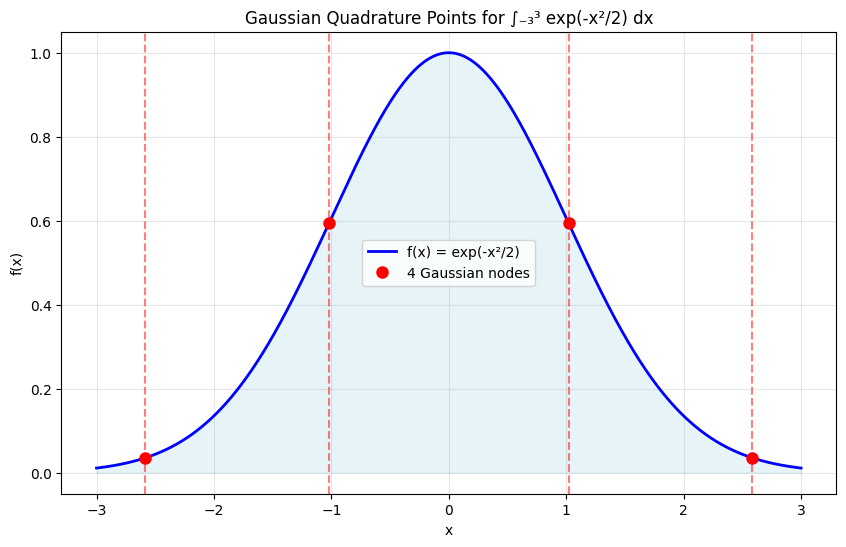


The plot shows the optimal placement of Gaussian quadrature points


In [25]:

# ---------------------
# Exercise EX.5.5.6.d
# ---------------------
# Using n = 4 Gaussian Quadrature, approximate the integrals
#
#      ∫₋₃³ exp(-x²/2) dx

# This work is licensed under a Creative Commons Attribution 4.0 International License
# https://creativecommons.org/licenses/by/4.0/
# Copyright (c) 2021, Julien Langou. All rights reserved.

import numpy as np
import scipy.integrate
import scipy.special
from math import sqrt, pi, exp

print("4-Point Gaussian Quadrature for ∫₋₃³ exp(-x²/2) dx")
print("=" * 55)

# Method 0: Exact value using error function
# ∫₋₃³ exp(-x²/2) dx
# Change of variable: √2 * x = t, so x = t/√2, dx = dt/√2
# = 1/√2 ∫₋₃√₂³√² exp(-t²) dt
# = 2/√2 ∫₀³√² exp(-t²) dt  (by symmetry)
# = √(2π) * erf(3/√2)

integral_exact = sqrt(2.0 * pi) * scipy.special.erf(3.0 / sqrt(2.0))

print(f"Exact integral = {integral_exact:20.16f}")
print()

# Method 1: Using scipy.integrate.quad for verification
f = lambda x: np.exp(-x**2 / 2.0)
a = -3.0
b = 3.0

integral_scipy = scipy.integrate.quad(f, a, b)[0]
print(f"SciPy result = {integral_scipy:20.16f}   error = {abs(integral_scipy - integral_exact):6.2e}")
print()

# Method 2: Using 4-point Gaussian Quadrature
print("4-Point Gaussian Quadrature:")
print()

# Gaussian quadrature nodes and weights for n=4 on [-1,1]
# These are the roots of the 4th Legendre polynomial and corresponding weights
nodes_std = np.array([-0.8611363115940526, -0.3399810435848563,
                      0.3399810435848563, 0.8611363115940526])
weights_std = np.array([0.3478548451374538, 0.6521451548625461,
                       0.6521451548625461, 0.3478548451374538])

# Transform from standard interval [-1,1] to [a,b]
# x = ((b-a)/2)*t + (a+b)/2, where t ∈ [-1,1]
def transform_nodes_weights(nodes, weights, a, b):
    """Transform Gaussian nodes and weights from [-1,1] to [a,b]"""
    # Linear transformation: x = ((b-a)/2)*t + (a+b)/2
    nodes_transformed = ((b - a) / 2.0) * nodes + (a + b) / 2.0
    weights_transformed = ((b - a) / 2.0) * weights
    return nodes_transformed, weights_transformed

nodes, weights = transform_nodes_weights(nodes_std, weights_std, a, b)

print("Transformed nodes and weights for interval [-3, 3]:")
print("Node           Weight         f(node)")
print("-" * 45)

integral_gaussian = 0.0
for i in range(4):
    f_value = f(nodes[i])
    integral_gaussian += weights[i] * f_value
    print(f"{nodes[i]:10.6f}    {weights[i]:10.6f}    {f_value:10.6f}")

error_gaussian = abs(integral_gaussian - integral_exact)

print()
print(f"Gaussian result = {integral_gaussian:20.16f}   error = {error_gaussian:6.2e}")
print()

# Analysis
print("Analysis:")
print(f"- 4-point Gaussian quadrature is exact for polynomials up to degree 2n-1 = 7")
print(f"- exp(-x²/2) is not a polynomial, so we expect some error")
print(f"- Error achieved: {error_gaussian:6.2e}")

# Compare with Trapezoid and Simpson's Rule (rough estimates)
print()
print("Comparison with other methods (for reference):")

# Simple comparison - Trapezoid rule with same number of points
h = (b - a) / 3  # 3 intervals, 4 points
trap_approx = h * (f(a)/2 + f(a+h) + f(a+2*h) + f(b)/2)
trap_error = abs(trap_approx - integral_exact)

print(f"Trapezoid (4 pts): {trap_approx:20.16f}   error = {trap_error:6.2e}")

# Simpson's rule with 4 points (Simpson's 1/3 rule on 3 intervals)
simp_approx = (h/3) * (f(a) + 4*f(a+h) + 2*f(a+2*h) + 4*f(a+3*h) + f(b))
simp_error = abs(simp_approx - integral_exact)

print(f"Simpson's (4 pts): {simp_approx:20.16f}   error = {simp_error:6.2e}")
print(f"Gaussian (4 pts):  {integral_gaussian:20.16f}   error = {error_gaussian:6.2e}")

print()
print("Gaussian Quadrature Advantages:")
print("- Achieves highest possible accuracy for given number of function evaluations")
print("- Optimal placement of evaluation points")
print(f"- With only 4 function evaluations, achieved {-np.log10(error_gaussian):.1f} digits of accuracy")

# Plot the function and Gaussian points
import matplotlib.pyplot as plt

x_plot = np.linspace(a, b, 1000)
y_plot = [f(x) for x in x_plot]

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, 'b-', linewidth=2, label='f(x) = exp(-x²/2)')
plt.plot(nodes, [f(node) for node in nodes], 'ro', markersize=8,
         label='4 Gaussian nodes')
plt.fill_between(x_plot, 0, y_plot, alpha=0.3, color='lightblue')

# Add vertical lines at Gaussian points
for node in nodes:
    plt.axvline(x=node, color='red', linestyle='--', alpha=0.5)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gaussian Quadrature Points for ∫₋₃³ exp(-x²/2) dx')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print()
print("The plot shows the optimal placement of Gaussian quadrature points")